# Timing of COMBIp vs COMBI etc

In [1]:
%reset -f
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.ticker import FormatStrFormatter
import matplotlib.cm as cm
import scipy.integrate as integrate




In [2]:
sys.path.append('../')
from plot_configuration import *
%matplotlib notebook

Finished configuring the plots.


In [3]:
# # Set style of plots
# ticksize= 14
# titlesize = 16
# mpl.rcParams.update({'font.size':ticksize }) 
# mpl.rcParams.update({'legend.fontsize':ticksize })# legend
# mpl.rcParams.update({'ytick.labelsize':ticksize })
# mpl.rcParams.update({'xtick.labelsize':ticksize })
# mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
# mpl.rcParams.update({'axes.labelsize':titlesize})    # x,y,cbar labels
# mpl.rcParams.update({'figure.titlesize' :titlesize})
# mpl.rcParams.update({'savefig.bbox':'tight'})
# mpl.rcParams.update({'axes.formatter.limits':[-4,4]})
# mpl.rcParams.update({'figure.figsize':[6,5]})
# mpl.rcParams.update({'mathtext.fontset':'cm'})
# mpl.rcParams.update({'font.style':'normal'})

# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

# pi2 = 2*np.pi

# print(sys.version_info)

In [4]:
def amdahl(x,p):
    return 1/(1-p + p/x)

# x = np.arange(1,100)
# plt.figure()
# plt.plot(x,amdahl(x,0.5))
# plt.plot(x,amdahl(x,0.99)/x)

In [75]:
# Load file
study=3
bool_weak=0
bool_8 = 1
if study==1:
    suffix = "_inco8"
    xb = [10,8][bool_8]

elif study==2:
    suffix = "_BB8"
    xb = [20,16][bool_8]

elif study==3:
    suffix = "_wake8"
    xb = [10,8][bool_8]
    
elif study==4:
    suffix="_wakeBB8noI"
    xb = [20,16][bool_8]

elif study==5:
    suffix="_wakeBB8s"
    xb = [20,16][bool_8]

    
dirname="timing_COMBIp/"
fname = dirname+"timing_numbers" + suffix
cfname= dirname+"ctiming_numbers" + suffix


dstr = np.genfromtxt(fname,dtype='str')
dstr = dstr[:,6:]
data = np.loadtxt(fname,comments=" .")
cstr = np.genfromtxt(cfname,dtype='str')
cstr = cstr[:,6:]
cdata = np.loadtxt(cfname,comments=" .")

# delimiter
dat=data
if 0:
    for i in range(np.size(dat[:,0])):
        print("%4d %4d %8.4f %4d %4d %s"%(dat[i,0],dat[i,1],dat[i,3],dat[i,4],dat[i,5],dstr[i,0]))
# print(dstr)

In [76]:
mpi_time=[[],[],[]]
mpi_cores=[[],[],[]]
mpi_std=[[],[],[]]
# print(mpi_time[2])

In [78]:
# Strong scaling

nproc=data[:,0]
nthrd=data[:,1]
time=data[:,3]/data[:,5]
nbunches=data[:,4]

j=0
for method in [1,2,3]:
    print('method',method)

    if method==1: #omp first
        xthread = np.array([1,2,3,4,5,6,8,10,12,14,16,18,20, 10,10,10])
        xprocs = np.array([ 1,1,1,1,1,1,1,1 ,1 ,1 ,1 ,1 ,1 ,  2,5 ,10])
        xthread = np.array([1,2,3,4,5,6,8,10,12,14,16,18,20, 20,20,20,20,20])
        xprocs = np.array([ 1,1,1,1,1,1,1,1 ,1 ,1 ,1 ,1 ,1 , 2 ,4 ,5 ,8 ,10])
        xthread = np.array([1,2,3,4,5,6,8,10,12,14,16, 16,16,16,16,16])
        xprocs = np.array([ 1,1,1,1,1,1,1,1 ,1 ,1 ,1 , 2 ,4 ,5 ,8 ,10])
        if bool_8:
            xthread = np.array([1,2,3,4,5,6,7,8,10,12,14,16, 16,16,16,16,16])
            xprocs = np.array([ 1,1,1,1,1,1,1,1 ,1 ,1 ,1 ,1,  2 ,4 ,5 ,8 ,10])
        
    elif method==2: # MPI first
        
        if study==1 or study == 3:
            xprocs = np.array([1,2,3,4,5,6,7,8,9,10, 10,10,10,10,10,10,10,10,10])
            xthread =np.array([1,1,1,1,1,1,1,1,1,1 ,  2,3 ,4 ,5 ,6 ,8, 10,12,16])
        elif study==2:
            xprocs = np.array([1,2,3,4,5,6,7,8,9,10,  20,20,20,20,20,20,20,20,20])
            xthread =np.array([1,1,1,1,1,1,1,1,1,1,    1,2 ,3 ,4 ,5 ,6 ,8 ,10,12])
        elif study==4 or study==5:
            nmpi=4
            if j==2 or study==5:
                xprocs = np.array([1,2,3,4,5,6,7,8,9,10,  20,20,20,20,20,20,20,20,20])
                xthread =np.array([1,1,1,1,1,1,1,1,1,1,    1,2 ,3 ,4 ,5 ,6 ,8 ,10,12])

            elif j==1:
                xprocs = np.array([1,2,3,4,5,6,7,8,9,10, 10,10,10,10,10,10,10,10,10])
                xthread =np.array([1,1,1,1,1,1,1,1,1,1 ,  2,3 ,4 ,5 ,6 ,8, 10,12,16])

            elif j==0:
                xprocs = np.array([1,2,3,4,5,6,7,8,9, 4,4,4,4 ,4 ,4 ,4])
                xthread =np.array([1,1,1,1,1,1,1,1,1, 2,4,8,12,16,20,24])
                
        if bool_8:
            if study==1 or study == 3:
                xprocs = np.array([1,2,3,4,5,6,7,8,8,8,8,8,8,8,8 ,8 ,8 ,8 ,8])
                xthread =np.array([1,1,1,1,1,1,1,1,2,3,4,5,6,8,10,12,14,16,20])
                
                xprocs = np.array([1,2,4,8,8,8,8,8,8,8,8 ,8])
                xthread =np.array([1,1,1,1,2,3,4,5,6,8,16,20])
                
            elif study==2:
                xprocs = np.array([1,2,3,4,5,6,7,8,10,12,16,  16,16,16,16,16,16,16,16,16,16])
                xthread =np.array([1,1,1,1,1,1,1,1,1 ,1 ,1 ,  1 ,2 ,3 ,4 ,5 ,6 ,8 ,10,12,16])
            elif study==4 or study==5:
                nmpi=4
                if j==2 or study==5:
                    xprocs = np.array([1,2,3,4,5,6,7,8,10,12,16,16,16,16,16,16,16,16,16,16])
                    xthread =np.array([1,1,1,1,1,1,1,1,1 ,1 ,1 ,2 ,3 ,4 ,5 ,6 ,8 ,10,12,16])

                elif j==1:
                    xprocs = np.array([1,2,3,4,5,6,7,8,8,8,8,8,8,8,8 ,8 ,8 ,8 ,8])
                    xthread =np.array([1,1,1,1,1,1,1,1,2,3,4,5,6,8,10,12,14,16,20])
                elif j==0:
                    xprocs = np.array([1,2,3,4,4,4,4,4 ,4 ,4 ,4])
                    xthread =np.array([1,1,1,1,2,4,8,12,16,20,24])
                
            
    elif method == 3: # Combi
        xthread=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])    
        if study==1 or study==3:
            xprocs =np.ones_like(xthread)*[11,9][bool_8]
        elif study==2 or study==4 or study == 5:
            xprocs =np.ones_like(xthread)*[21,17][bool_8]
        nproc=cdata[:,0]
        nthrd=cdata[:,1]
        time=cdata[:,3]/cdata[:,5]
        nbunches=cdata[:,4]
        


    N = np.size(xthread)
    avgtime = np.zeros(N)
    stdtime = np.zeros(N)
    ncores = np.zeros(N)
    
    for i in range(N):
        xt = xthread[i]
        xp = xprocs[i]
#         if not (xp in [1,2,4,8]): 
#             continue
#         print(xp)
        ncores[i] = xt*xp
        ind = (nthrd == xt)*(xp == nproc)*(xb==nbunches)
    #     ind = np.logical_and(nthrd == xt, xp == nproc)
        if np.size(time[ind])>0:
            avgtime[i]=np.mean(time[ind])
#             avgtime[i]=np.max(time[ind])
            stdtime[i]=np.std(time[ind])
        else:
            avgtime[i]=np.NaN
            stdtime[i]=np.NaN
            print(xt,xp)
#         print('std',)
    if method<3:
        time_serial = np.mean(time[np.logical_and(nthrd==1,nproc==1)])
    
    ind2 = np.isfinite(avgtime)
    ncores = ncores[ind2]
    avgtime=avgtime[ind2]
    stdtime=stdtime[ind2]

    if method==1:
        omp_time=avgtime
        omp_cores=ncores
        omp_std=stdtime
    elif method==2:
        
        if study==4 :
            mpi_time[j] =avgtime
            mpi_cores[j]=ncores
            mpi_std[j]  =stdtime
        else:
            mpi_time=avgtime
            mpi_cores=ncores
            mpi_std=stdtime
    elif method==3:
        combi_time=avgtime
        combi_cores=ncores
        combi_std=stdtime


method 1
3 1
5 1
7 1
10 1
14 1
16 5
16 10
method 2
3 8
5 8
6 8
20 8
method 3
5 9
7 9
9 9
11 9
12 9
13 9


<IPython.core.display.Javascript object>


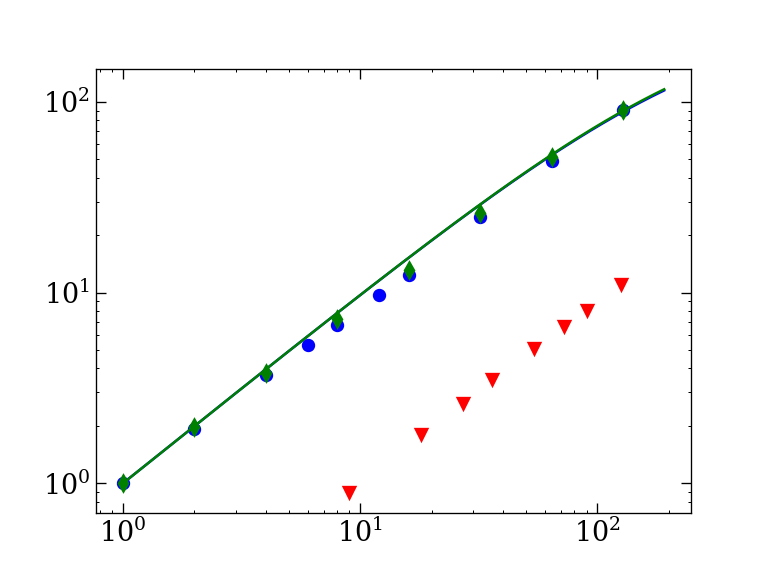

<IPython.core.display.Javascript object>


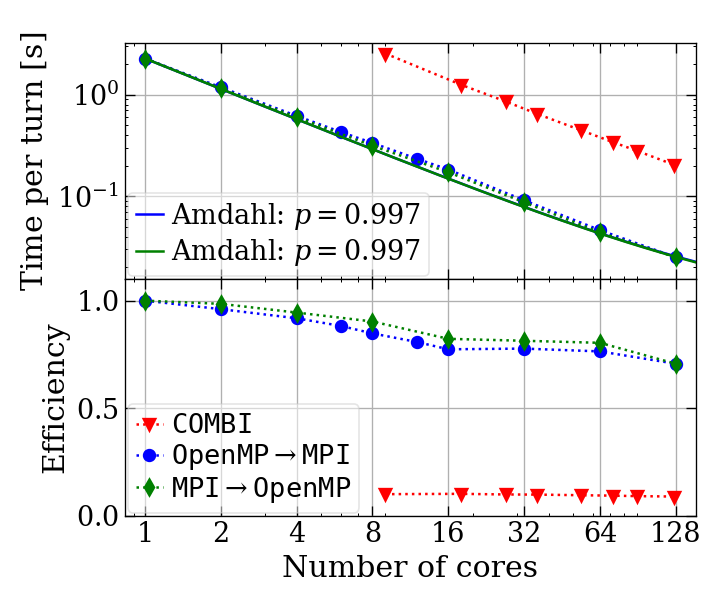

$\mathtt{COMBI}$
[  9.  18.  27.  36.  54.  72.  90. 126.] [2.539 1.251 0.859 0.648 0.445 0.341 0.28  0.204]
parallel part:  2 [0.845] [[0.001]]
efficiency:     [0.099 0.101 0.098 0.097 0.094 0.092 0.09  0.088]
ncores:         [  9.  18.  27.  36.  54.  72.  90. 126.]
time            [2.539 1.251 0.859 0.648 0.445 0.341 0.28  0.204]
time std (rel)  [0.    0.002 0.002 0.003 0.001 0.004 0.002 0.001]


<IPython.core.display.Javascript object>


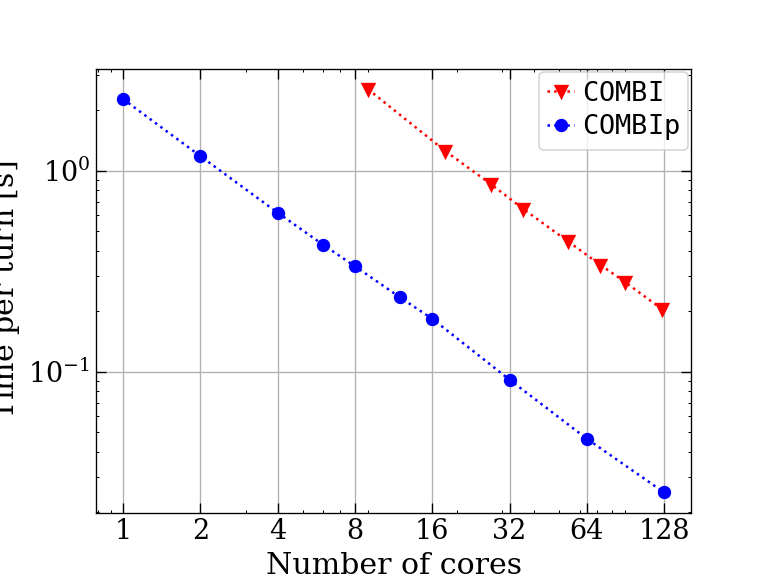

$\mathtt{OpenMP}\rightarrow\mathtt{MPI}$
[  1.   2.   4.   6.   8.  12.  16.  32.  64. 128.] [2.269 1.182 0.618 0.429 0.335 0.234 0.183 0.091 0.046 0.025]
parallel part:  0 [0.997] [[7.254e-08]]
efficiency:     [1.    0.96  0.918 0.882 0.847 0.808 0.774 0.777 0.764 0.706]
ncores:         [  1.   2.   4.   6.   8.  12.  16.  32.  64. 128.]
time            [2.269 1.182 0.618 0.429 0.335 0.234 0.183 0.091 0.046 0.025]
time std (rel)  [0.006 0.006 0.001 0.003 0.002 0.004 0.019 0.004 0.004 0.063]
$\mathtt{MPI}\rightarrow\mathtt{OpenMP}$
[  1.   2.   4.   8.  16.  32.  64. 128.] [2.269 1.152 0.601 0.314 0.172 0.087 0.044 0.025]
parallel part:  1 [0.997] [[3.154e-08]]
efficiency:     [1.    0.985 0.944 0.903 0.822 0.813 0.804 0.706]
ncores:         [  1.   2.   4.   8.  16.  32.  64. 128.]
time            [2.269 1.152 0.601 0.314 0.172 0.087 0.044 0.025]
time std (rel)  [0.006 0.013 0.008 0.003 0.015 0.004 0.004 0.063]
$\mathtt{MPI}\rightarrow\mathtt{OpenMP}$
$\mathtt{MPI}\rightarrow\mathtt{O

In [79]:
# Strong scaling

fig2 = plt.figure(2)


fig = plt.figure(1,figsize=(figwidth,figheight*1.0))
ax1 = fig.add_subplot(211)
ax1.set_ylabel(r"Time per turn $[\mathrm{s}]$")
ax2 = fig.add_subplot(212,sharex= ax1)
ax2.set_ylabel("Efficiency")
ax2.set_xlabel("Number of cores")
ax1.grid(True) ; ax2.grid(True)
# ax1.get_xaxis().set_visible(False)


XS = [omp_cores,mpi_cores,combi_cores]
YS = [omp_time,mpi_time,combi_time]
ERRS=[omp_std,mpi_std,combi_std]
cols = ['b','g','r']
ms = ['o','d','v']
labs = [r'$\texttt{OpenMP}\rightarrow\texttt{MPI}$',r'$\texttt{MPI}\rightarrow\texttt{OpenMP}$',r'$\texttt{COMBI}$']
labs2 = [r'$\texttt{COMBIp}$','',r'$\texttt{COMBI}$']
labs = [r'$\mathtt{OpenMP}\rightarrow\mathtt{MPI}$',r'$\mathtt{MPI}\rightarrow\mathtt{OpenMP}$',r'$\mathtt{COMBI}$']
labs2 = [r'$\mathtt{COMBIp}$','',r'$\mathtt{COMBI}$']
j=0
for i in [2,0,1,1,1]:
    print(labs[i])
    plt.figure(1)
    
    X = XS[i]
    Y = YS[i]
    ERR = ERRS[i]
    c=cols[i]
    lab=labs[i]
    m=ms[i]
    if i==1:
        if study==4 :
            X = XS[i][j]
            Y = YS[i][j]

            print('x',X)
            print('x')
            ERR = ERRS[i][j]
            m=['+','x','d'][j]
            size = 6#[10,10,8][j]
            j+=1
            if j==1:
                print('ohoh')
                print(X,Y)
                popt,pcov = curve_fit(amdahl,X,time_serial/Y)
                temp = np.arange(1,np.max(X)*1.5)
                ax1.loglog(temp,time_serial/amdahl(temp,popt),cols[i],ms=size,label=r"Amdahl: $p=%.3f$"%popt)
            if j<3:
                ax1.loglog(X,Y,':'+m+c,mew=2,ms=size)
                ax2.semilogx(X,time_serial/Y/X,':'+m+c,mew=2,ms=size)
                continue
        else:
            j+=1
            if j>1:
                continue
        
    
    
    ax1.loglog(X,Y,':'+m+c)
    ax2.semilogx(X,time_serial/Y/X,':'+m+c,label=lab)
    
    
#     ax1.errorbar(XS[i],YS[i],yerr=ERRS[i],fmt=':',c=cols[i])
    
    #Amdahl
    if i!=1 or study<4:
        print(X,Y)
        popt,pcov = curve_fit(amdahl,X,time_serial/Y)
        temp = np.arange(1,np.max(X)*1.5)
        if i<2:
            None
            ax1.loglog(temp,time_serial/amdahl(temp,popt),cols[i],label=r"Amdahl: $p=%.3f$"%popt)
    #         ax2.semilogx(temp,amdahl(temp,popt)/temp,cols[i])
    print('parallel part: ', i,popt, pcov)
    print('efficiency:    ',time_serial/Y/X)
    print('ncores:        ',X)
    print('time           ',Y)
    print('time std (rel) ',np.array(ERR)/np.array(Y))
    
    plt.figure(2)
    plt.loglog(X,time_serial/Y,''+m+c)
    if i<2:
        plt.loglog(temp,amdahl(temp,popt),c,label=r"Amdahl: $p=%.3f$"%popt)
        
    if i!=1:
        plt.figure(3)
        plt.loglog(X,Y,':'+m+c,label=labs2[i])
    
plt.figure(1)
ax2.set_ylim(0.,1.1)
ax2.legend(loc=0,framealpha=0.5,labelspacing=0.1)#,fontsize=14)
ax1.legend(loc=0,framealpha=0.5)
ax1.set_xticks(2**np.arange(8))
ax2.set_xticks(2**np.arange(8))
ax2.set_xlim(1/1.2,128*1.2)
ax1.tick_params(labelbottom=False)
ax2.set_xticklabels(2**np.arange(8))

plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig("00_Plots/PHPC_strongscaling"+suffix+".png")
plt.savefig("00_Plots/PHPC_strongscaling"+suffix+".eps")


plt.figure(3)
plt.ylabel(r"Time per turn $[\mathrm{s}]$")
plt.xlabel("Number of cores")
plt.grid(True)
plt.legend(loc=0)
plt.xticks(2**np.arange(8),2**np.arange(8))

# plt.figure(2)
print("COMBIp vs COMBI Inco",1.88864589/2.10853698)
print("COMBIp vs COMBI BB  ",6.45003585/3.21257443)
print("COMBIp vs COMBI wake",2.26927332/2.53937046)
print("COMBIp vs COMBI waBB",7.23587496/3.88012359)


# Weak scaling

Weak scaling

8 bunch per 8 core (openmp)

1 bunch per 8 core (openmp)

1 bunch per 1 core 

cant overwrite 

In [60]:
# Load file
study=1
bool_weak=1
if study==1:
    wsuffix = "_inco_weak"
elif study==2:
    wsuffix = "_BB_weak"
    
wsuffix = "_weak"

dirname="timing_COMBIp/"
wfname = dirname+"timing_numbers" + wsuffix
wcfname= dirname+"ctiming_numbers" +wsuffix

dstr = np.genfromtxt(wfname,dtype='str')
dstr = dstr[:,6]
wdata = np.loadtxt(wfname,comments=" .")
# if not bool_weak:
#     cdata = np.loadtxt(cfname,comments=" .")

if 0: print(wdata[dstr=='.10.10.10.12.3',:])



In [61]:
# ## Strong scaling
# method=3

# nproc=wdata[:,0]
# nthrd=wdata[:,1]
# nbunches=wdata[:,4]
# time=wdata[:,3]/wdata[:,5]

# xprocs = np.array([1,2,4,8,16,32,64,128])
# if method==1: #1 bunch per 1 process
#     xthread = np.ones_like(xprocs)*1
#     xbunches= xprocs
# elif method==2: # 8 bunch per 8 procs
#     xthread = np.ones_like(xprocs)*8
#     xbunches= xprocs*xthread
# elif method == 3: # 1 bunch per 8 procs
#     xthread = np.ones_like(xprocs)*8
#     xbunches= xprocs
    

# N = np.size(xthread)
# avgtime = np.zeros(N)
# ncores = np.zeros(N)
# for i in range(N):
#     xt = xthread[i]
#     xp = xprocs[i]
#     xb = xbunches[i]
#     ncores[i] = xt*xp
#     ind = (nthrd == xt)*(xp == nproc)*(xb==nbunches)
#     if np.size(time[ind])>0:
#         avgtime[i]=np.mean(time[ind])
#     else:
#         avgtime[i]=np.NaN
#         print(xt,xp)
        

# time1 = np.mean(time[np.logical_and(nthrd==1,nproc==1)])

# ind2 = np.isfinite(avgtime)
# ncores = ncores[ind2]
# avgtime=avgtime[ind2]

# if method==1:
#     time11=avgtime
#     cores11=ncores
# elif method==2:
#     time88=avgtime
#     cores88=ncores
# elif method==3:
#     time18=avgtime
#     cores18=ncores

# print(xthread)
# print(xprocs)
# print(xbunches)
# print(avgtime)
# print(ncores)
# print(xbunches[ind2])


## Strong scaling
core_combi=1
time_combi=1

nproc=wdata[:,0]
nthrd=wdata[:,1]
nbunches=wdata[:,4]
time=wdata[:,3]/wdata[:,5]



method=2  # 1.1   8.8    1.8
combi_study=1
strings = ['.3','.10.10.10.3','.12.3','.10.10.10.12.3','.10.10.12.10','.']
strings = ['.3','.10.10.10.3','.12.3','.10.10.3.12.3.10','.10.10.12.10','.']
for study in [0,1,2,3,4,5]:
    if study == 5 and method>1.5: 
        continue
    xstrn = strings[study]
    xprocs = np.array([1,2,4,8,16,32,64,128])
    if method==1: #1 bunch per 1 process
        xthread = np.ones_like(xprocs)*1
        xbunches= xprocs
    
    elif method==2: # 8 bunch per 8 procs
        xthread = np.ones_like(xprocs)*8
        xbunches= xprocs*xthread
    
    elif method == 3: # 1 bunch per 8 procs
        xthread = np.ones_like(xprocs)*8
        xbunches= xprocs

    if study == 5: #COMBI
        if combi_study==1:
            wcdata = np.loadtxt(wcfname+"inco",comments=" .")
        elif combi_study==2:
            wcdata = np.loadtxt(wcfname+"wakeBB",comments=" .")
        print(wcdata)
        nproc=wcdata[:,0]
        nthrd=wcdata[:,1]
        nbunches=wcdata[:,4]
        time=wcdata[:,3]/wcdata[:,5]
        
        xprocs = np.array([9,17,33,65])
        xthread = np.ones_like(xprocs)
        xbunches=(xprocs-1)*xthread
        dstr = np.array(['.']*np.size(nproc))
        
    N = np.size(xthread)
    avgtime = np.zeros(N)
    ncores = np.zeros(N)
    for i in range(N):
        xt = xthread[i]
        xp = xprocs[i]
        xb = xbunches[i]
        ncores[i] = xt*xp
        ind = (nthrd == xt)*(xp == nproc)*(xb==nbunches)*(xstrn==dstr)
        if np.size(time[ind])>0:
            avgtime[i]=np.mean(time[ind])
        else:
            avgtime[i]=np.NaN
            print(xt,xp)


#     time1 = np.mean(time[np.logical_and(nthrd==1,nproc==1)])

    ind2 = np.isfinite(avgtime)
    ncores = ncores[ind2]
    avgtime=avgtime[ind2]

    if study==0:
        time_inco=avgtime
        core_inco=ncores
    elif study==1:
        time_BB=avgtime
        core_BB=ncores
    elif study==2:
        time_wake=avgtime
        core_wake=ncores
    elif study==3:
        time_wakeBB=avgtime
        core_wakeBB=ncores
    elif study==4:
        time_wakeBBnoI=avgtime
        core_wakeBBnoI=ncores
    elif study==5:
        time_combi=avgtime
        core_combi=ncores

    print('xthread ',xthread)
    print('xprocs  ',xprocs)
    print('xbunches',xbunches)
    print('avgtime ',avgtime)
    print('ncores  ',ncores)
    print(xbunches[ind2])
    
    print( dstr)

8 32
8 64
8 128
xthread  [8 8 8 8 8 8 8 8]
xprocs   [  1   2   4   8  16  32  64 128]
xbunches [   8   16   32   64  128  256  512 1024]
avgtime  [0.271 0.279 0.282 0.29  0.283]
ncores   [  8.  16.  32.  64. 128.]
[  8  16  32  64 128]
['.10.10.10.3' '.10.10.10.3' '.10.10.10.3' '.10.10.10.3' '.10.10.10.3'
 '.10.10.10.3' '.10.10.10.3' '.10.10.10.3' '.10.10.10.3' '.10.10.10.3'
 '.10.10.10.3' '.10.10.10.3' '.10.10.10.3' '.10.10.10.3' '.10.10.10.3'
 '.10.10.10.3' '.3' '.3' '.10.10.10.3' '.3' '.3' '.10.10.10.3'
 '.10.10.10.3' '.3' '.3' '.10.10.10.3' '.3' '.3' '.3' '.3' '.3' '.3' '.3'
 '.12.3' '.3' '.12.3' '.12.3' '.12.3' '.12.3' '.3' '.12.3' '.12.3' '.12.3'
 '.3' '.12.3' '.12.3' '.12.3' '.12.3' '.12.3' '.12.3' '.12.3' '.12.3'
 '.10.10.10.12.3' '.10.10.10.12.3' '.10.10.10.12.3' '.10.10.10.12.3' '.3'
 '.3' '.3' '.3' '.3' '.3' '.3' '.3' '.12.3' '.12.3' '.12.3' '.12.3'
 '.10.10.10.12.3' '.12.3' '.10.10.10.12.3' '.12.3' '.12.3'
 '.10.10.10.12.3' '.12.3' '.10.10.10.12.3' '.10.10.10.12.3'
 '.10.10

<IPython.core.display.Javascript object>


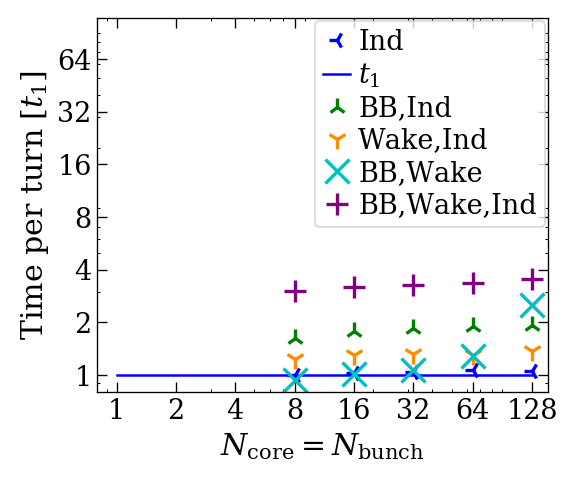

<IPython.core.display.Javascript object>


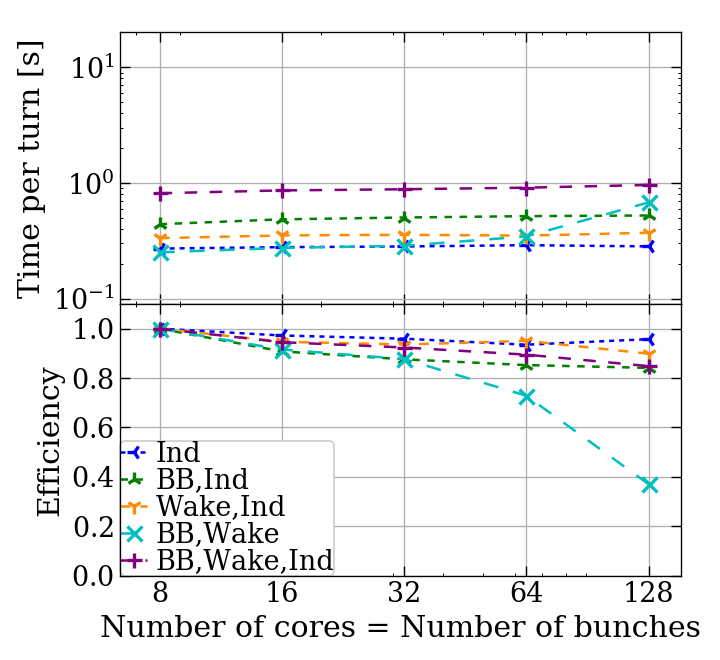

0 efficiency [1.    0.972 0.959 0.935 0.957] [0.271 0.279 0.282 0.29  0.283] [  8.  16.  32.  64. 128.]
timeserial =  0.27710757131048386 [7.937e-05 2.770e-01] 0.2698068525
1 efficiency [1.    0.908 0.876 0.852 0.841] [0.44  0.485 0.503 0.516 0.523] [  8.  16.  32.  64. 128.]
timeserial =  0.467873944453125 [0.001 0.467] 0.2698068525
2 efficiency [1.    0.947 0.936 0.95  0.899] [0.333 0.352 0.356 0.351 0.371] [  8.  16.  32.  64. 128.]
timeserial =  0.341558891232359 [2.278e-04 3.413e-01] 0.2698068525
4 efficiency [1.    0.915 0.877 0.728 0.37 ] [0.251 0.274 0.287 0.345 0.679] [  8.  16.  32.  64. 128.]
timeserial =  0.19643067255922392 [0.004 0.193] 0.2698068525
3 efficiency [1.    0.945 0.924 0.895 0.848] [0.815 0.862 0.882 0.911 0.96 ] [  8.  16.  32.  64. 128.]
timeserial =  0.8346618373336697 [0.001 0.834] 0.2698068525


In [62]:
fignr1= 666
fignr2= 667

fig2 = plt.figure(fignr2,figsize = (figwidth*.8,.8*figheight))


fig = plt.figure(fignr1,figsize = (figwidth*1,1.1*figheight))
ax1 = fig.add_subplot(211)
ax1.set_ylabel(r"Time per turn $[\mathrm{s}]$")
ax1.set_ylabel(r"Time per turn [s]")

ax2 = fig.add_subplot(212,sharex= ax1)
ax2.set_ylabel("Efficiency")
ax2.set_xlabel("Number of cores")
ax2.set_xlabel("Number of cores = Number of bunches")
ax1.grid(True) ; ax2.grid(True)
# ax1.get_xaxis().set_visible(False)

xticks = 2**np.arange(0,8)
cols = ['b','g','darkorange','purple','c','r']
ms = ['o','o','o','o','o','*']
ms = markers[5::-1]
if 1:
    XS = [core_inco,core_BB,core_wake,core_wakeBB,core_wakeBBnoI,core_combi]
    YS = [time_inco,time_BB,time_wake,time_wakeBB,time_wakeBBnoI,time_combi]
    labs = ['Ind','BB,Ind','Wake,Ind','BB,Wake,Ind','BB,Wake',r'$\mathtt{COMBI}$: Ind']
    labs = ['Ind','BB,Ind','Wake,Ind','BB,Wake,Ind','BB,Wake',r'$\mathbf{\mathtt{COMBI}}$: Ind']
    
else:
    XS = [cores11,cores88,cores18]
    YS = [time11,time88,time18]
    labs = ['1 bunch per core proc','8 bunch per 8 core proc','1 bunch per 8 core proc']

#simple plot
if 0:
    ms = ['x','o','o','o','o','+']
    labs = [r'New $\mathbf{\mathtt{COMBIp}}$','BB,Ind','Wake,Ind','BB,Wake,Ind','BB,Wake',r'Old $\mathbf{\mathtt{COMBI}}$']
    
for i in [0,1,2,4,3,5]:
# for i in [5,0]:
    if i ==5 and method>1.3: continue
    print(i,'efficiency',YS[i][0]/YS[i],YS[i],XS[i])
    plt.figure(fignr1)
    ax1.loglog(XS[i],YS[i],ms[i],ms=9,c=cols[i],markeredgecolor=cols[i],ls=(0,[2+i,2+i])) 
    ax2.semilogx(XS[i],YS[i][0]/YS[i],ms[i],ms=9,c=cols[i],label=labs[i],zorder=3,markeredgecolor=cols[i],ls=(0,[2+i,2+i])) 
    
    #Amdahl
#     popt,pcov = curve_fit(amdahl,XS[i],time_serial/YS[i])
    popt = np.polyfit(XS[i],YS[i],deg=1)
#     temp = np.arange(1,np.max(XS[i])*1.2)
#     if i<2:
#         ax1.loglog(temp,time_serial/amdahl(temp,popt),cols[i],label=r"Amdahl: $p=%.3f$"%popt)
#         ax2.semilogx(temp,amdahl(temp,popt)/temp,cols[i])
#     print('parallel part: ', i,popt)
#     print('speedup',time_serial/YS[i])
#     print('ncores',XS[i])
    timeserial = time_inco[0]-1.12e-4*10
    
    print('timeserial = ',popt[1]+1*popt[0],popt,timeserial)
    plt.figure(fignr2)
    plt.loglog(XS[i],YS[i]/timeserial,ms[i],c=cols[i],markeredgecolor=cols[i],ms=10+i,ls='',label=labs[i])#ls=(0,[2+i,2+i])) 
    
    
    if i==0:
        plt.plot(xticks,np.ones_like(xticks),'b',label=r'$t_1$')
    if i==5:
        plt.plot(xticks,xticks,'r',label=r'$t_1 \cdot N_\mathrm{bunch}$')
    
#     plt.loglog(XS[i],time_serial/YS[i],''+ms[i]+cols[i])
#     if i<2:
#         plt.loglog(temp,amdahl(temp,popt),cols[i],label=r"Amdahl: $p=%.3f$"%popt)
    
    
plt.figure(fignr1)
ax2.set_yticks(np.arange(0,1.3,0.2))
ax2.set_ylim(0,1.1)

# ax1.set_ylim(0.01,1)
# ax1.legend(loc=0,framealpha=0.5)
ax2.legend(loc=(0,0),framealpha=1,labelspacing=0,frameon=True,borderpad=0).set_zorder(2)
# ax1.set_xticks(2**np.arange(3,8))
# ax2.set_xticks(2**np.arange(3,8))
ax1.tick_params(labelbottom=False)
# ax2.set_xticklabels(2**np.arange(8))
ax1.set_ylim(0.09,20)

for axi in [ax1,ax2]:
    axi.set_xticks(2**np.arange(3,8))
    axi.set_xlim(2**3*.8,2**7*1.2)
# ax2.set_xticks(2**np.arange(3,8))
ax2.set_xticklabels(2**np.arange(3,8))
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig("00_Plots/PHPC_weakscaling"+wsuffix+"_%d.png"%method)
plt.savefig("00_Plots/PHPC_weakscaling"+wsuffix+"_%d.eps"%method)

# Figure 2
plt.figure(fignr2)
ax=plt.gca()
ax.set_xticks(xticks)
ax.set_xlim(2**0*.8,2**7*1.2)
ax.set_xticklabels(xticks)
ax.set_yticks(xticks)
ax.set_ylim(2**0*.8,2**7*1.2)
ax.set_yticklabels(xticks)
ax.set_ylabel(r"Time per turn [$t_1$]")
ax.set_xlabel("Number of cores = Number of bunches")
ax.set_xlabel(r"$N_\mathrm{core} = N_\mathrm{bunch}$")


ax.legend(loc=0)#,framealpha=1,labelspacing=0,frameon=False).set_zorder(2)
ax.set_ylim(0.8,110)
fig2.tight_layout()
plt.savefig("00_Plots/PHPC_weakscaling_simple"+wsuffix+"_%d.png"%method)

In [6]:
['']*3

['', '', '']